In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore
import plotly.express as px

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\heman\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\heman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv('sentimentdataset.csv')

In [4]:
data

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


# EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [6]:
data.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [13]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [16]:
def count_distinct_value():
    for column in data.columns:
        num_distinct_values = len(data[column].unique())
        print(f"{column}:{num_distinct_values} distinct_values")
        
count_distinct_value
        

<function __main__.count_distinct_value()>

In [17]:
def count_distinct_value():
    for column in data.columns:
        num_distinct_values = len(data[column].unique())
        print(f"{column}: {num_distinct_values} distinct values")


count_distinct_value()

Unnamed: 0.1: 732 distinct values
Unnamed: 0: 732 distinct values
Text: 707 distinct values
Sentiment: 279 distinct values
Timestamp: 683 distinct values
User: 685 distinct values
Platform: 4 distinct values
Hashtags: 697 distinct values
Retweets: 26 distinct values
Likes: 38 distinct values
Country: 115 distinct values
Year: 14 distinct values
Month: 12 distinct values
Day: 31 distinct values
Hour: 22 distinct values


In [21]:
data.drop(columns=['Unnamed: 0.1','Unnamed: 0'],axis=1)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [22]:
data.Platform.value_counts()

 Instagram     258
 Facebook      231
 Twitter       128
 Twitter       115
Name: Platform, dtype: int64

In [23]:
data.Country.value_counts()

 USA               59
 USA               55
 UK                49
 Canada            44
 Australia         41
                   ..
 Netherlands        1
 USA                1
 Germany            1
 France             1
 USA                1
Name: Country, Length: 115, dtype: int64

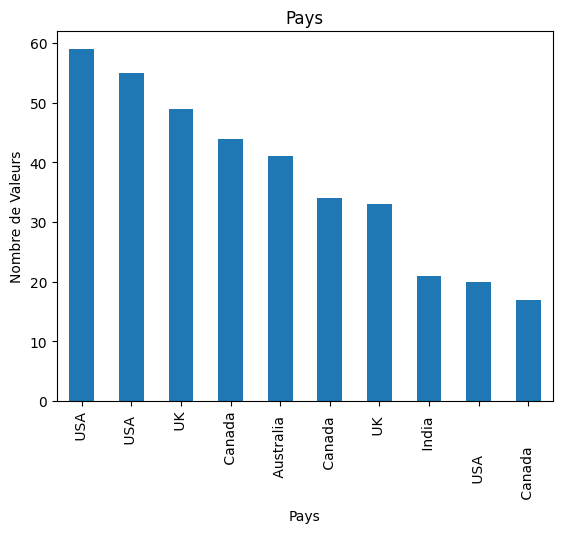

In [25]:
data['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Pays')
plt.xlabel('Pays')
plt.ylabel('Nombre de Valeurs')
plt.show()

In [26]:
data['Country'] = data['Country'].str.strip()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


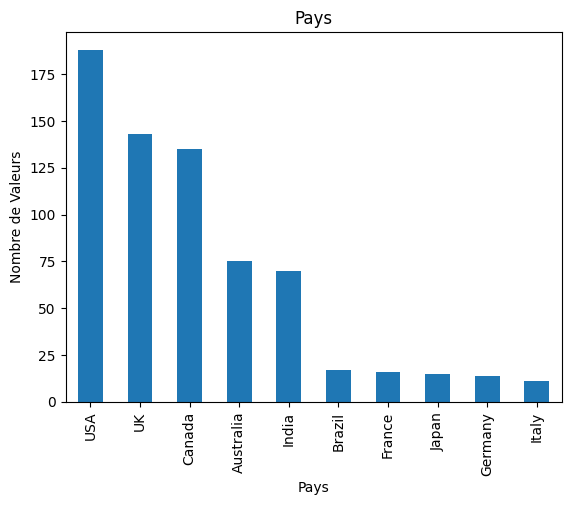

In [29]:
data['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Pays')
plt.xlabel('Pays')
plt.ylabel('Nombre de Valeurs')
plt.show()

In [30]:
data_test = data.copy()


def categorize_sentiment(sentiment):
    positive_sentiments = ['Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration', 'Affection', 'Awe',
                           'Surprise', 'Acceptance', 'Adoration', 'Anticipation', 'Calmness', 'Excitement',
                           'Kind', 'Pride', 'Shame', 'Elation', 'Euphoria', 'Contentment', 'Serenity', 'Gratitude',
                           'Hope', 'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm',
                           'Fulfillment', 'Reverence', 'Hopeful', 'Proud', 'Grateful', 'Empathetic', 'Compassionate',
                           'Playful', 'Free-spirited', 'Inspired', 'Confident']
    negative_sentiments = ['Anger', 'Fear', 'Sadness', 'Disgust', 'Bitter', 'Confusion', 'Despair', 'Grief',
                           'Loneliness', 'Jealousy', 'Resentment', 'Frustration', 'Boredom', 'Anxiety',
                           'Intimidation', 'Helplessness', 'Envy', 'Regret', 'Hate', 'Bad', 'Fearful',
                           'Apprehensive', 'Overwhelmed', 'Jealous', 'Devastated', 'Frustrated', 'Envious',
                           'Dismissive', 'Nervous', 'Worried', 'Tense', 'Stressed', 'Depressed', 'Miserable',
                           'Lonely', 'Insecure', 'Guilty', 'Embarrassed', 'Mischievous', 'Sad']
    
    if sentiment.strip() in positive_sentiments:
        return 'Positive'
    elif sentiment.strip() in negative_sentiments:
        return 'Negative'
    else:
        return 'Neutral'

# Appliquer la fonction de regroupement sur la colonne des sentiments
data_test['Sentiment_Category'] = data_test['Sentiment'].apply(categorize_sentiment)

# Création de colonnes pour indiquer si le sentiment est positif, négatif ou neutre
data_test['Positive'] = data_test['Sentiment_Category'] == 'Positive'
data_test['Negative'] = data_test['Sentiment_Category'] == 'Negative'
data_test['Neutral'] = data_test['Sentiment_Category'] == 'Neutral'

data_test.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Sentiment_Category,Positive,Negative,Neutral
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,Neutral,False,False,True
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,Neutral,False,False,True
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,Neutral,False,False,True
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,Neutral,False,False,True
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,Neutral,False,False,True


In [34]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))


def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '',text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub(r'\s+',' ',text.strip())
    text = re.sub('<.*?>+', '',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = " ".join(text.split())
    tokens = word_tokenize(text)
    
    cleanned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
    
    cleanned_text = ' '.join(cleanned_tokens)
    
    return cleanned_text

data['Clean_Text'] = data['Text'].apply(clean)

In [35]:
colonne_special = ['Platform','Country','Year','Month','Day']


for col in colonne_special:
    total_unique_values = data[col].unique()
    print(f'Total unique values fro {col}: {total_unique_values}')
    
    top_values = data[col].value_counts()
    
    colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]
    
    
    for i, (value,count) in enumerate(top_values.items()):
        color = colors[i % len(colors)]
        print(f'{colors}{value}:{count}{Fore.RESET}')
        
    print('\n' + '=' * 30 + '\n')

Total unique values fro Platform: [' Twitter  ' ' Instagram ' ' Facebook ' ' Twitter ']
['\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b'] Instagram :258
['\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b'] Facebook :231
['\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b'] Twitter :128
['\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b'] Twitter  :115


Total unique values fro Country: ['USA' 'Canada' 'UK' 'Australia' 'India' 'France' 'Brazil' 'Japan'
 'Greece' 'Germany' 'Sweden' 'Italy' 'Netherlands' 'South Africa' 'Spain'
 'Portugal' 'Switzerland' 'Austria' 'Belgium' 'Denmark' 'Czech Republic'
 'Jordan' 'Peru' 'Maldives' 'China' 'Cambodia' 'Norway' 'Colombia'
 'Ireland' 'Jamaica' 'Kenya' 'Scotland' 'Thailand']
['\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b']USA:188
['\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x1b', '\x

In [37]:
colonne_special= ['Platform','Country', 'Year','Month','Day']

for col in colonne_special:
    total_unique_values = data[col].nunique()
    print(f'Total unique values for {col}: {total_unique_values}')

    top_values = data[col].value_counts()

    colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]

    for i, (value, count) in enumerate(top_values.items()):
        color = colors[i % len(colors)]
        print(f'{color}{value}: {count}{Fore.RESET}')

    print('\n' + '=' * 30 + '\n')  

Total unique values for Platform: 4
 Instagram : 258
 Facebook : 231
 Twitter : 128
 Twitter  : 115


Total unique values for Country: 33
USA: 188
UK: 143
Canada: 135
Australia: 75
India: 70
Brazil: 17
France: 16
Japan: 15
Germany: 14
Italy: 11
Spain: 6
South Africa: 6
Greece: 5
Netherlands: 4
Switzerland: 3
Portugal: 2
Austria: 2
Belgium: 2
Denmark: 2
Czech Republic: 2
Sweden: 2
Colombia: 1
Scotland: 1
Kenya: 1
Jamaica: 1
Ireland: 1
China: 1
Norway: 1
Cambodia: 1
Maldives: 1
Peru: 1
Jordan: 1
Thailand: 1


Total unique values for Year: 14
2023: 289
2019: 73
2020: 69
2021: 63
2022: 63
2018: 56
2017: 43
2016: 38
2015: 19
2011: 4
2012: 4
2013: 4
2014: 4
2010: 3


Total unique values for Month: 12
2: 85
1: 82
8: 78
9: 77
6: 71
7: 62
4: 51
11: 49
10: 48
5: 46
3: 44
12: 39


Total unique values for Day: 31
15: 73
10: 63
28: 59
18: 49
5: 48
20: 39
22: 39
12: 38
8: 34
2: 27
1: 26
30: 23
25: 23
3: 21
17: 17
19: 14
14: 13
27: 12
11: 11
24: 11
16: 11
29: 11
7: 11
26: 10
23: 10
21: 10
13: 7
6: 7


In [39]:
data_sentiment = data.copy()

analyzer = SentimentIntensityAnalyzer()

data_sentiment['Vader_Score'] = data_sentiment['Clean_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

data_sentiment['Sentiment'] = data_sentiment['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(data_sentiment[['Clean_Text', 'Vader_Score', 'Sentiment']].head(10))

                              Clean_Text  Vader_Score Sentiment
0                  enjoy beauti day park       0.4939  positive
1                   traffic terribl morn       0.0000   neutral
2                    finish amaz workout       0.0000   neutral
3            excit upcom weekend getaway       0.0000   neutral
4           tri new recip dinner tonight       0.0000   neutral
5            feel grate littl thing life       0.0000   neutral
6  raini day call cozi blanket hot cocoa       0.0000   neutral
7              new movi releas mustwatch       0.0000   neutral
8             polit discuss heat timelin       0.0000   neutral
9             miss summer vibe beach day      -0.1531  negative


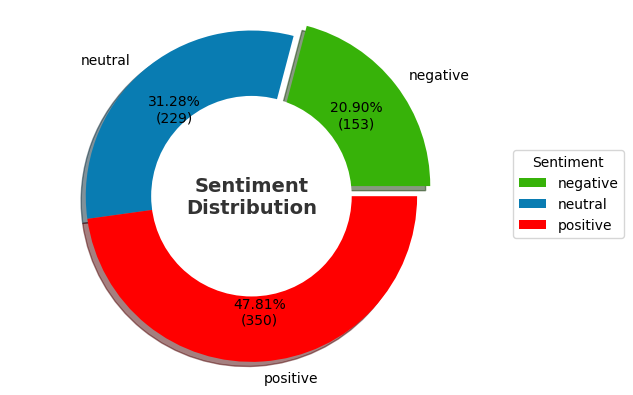

In [41]:
colors = ['#37B209', '#097CB2', '#FF0000']

explode = (0.1, 0, 0)  

sentiment_counts = data_sentiment.groupby("Sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', 
    wedgeprops=dict(width=1),
    textprops=dict(size=10, color="black"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)
ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  

plt.show()

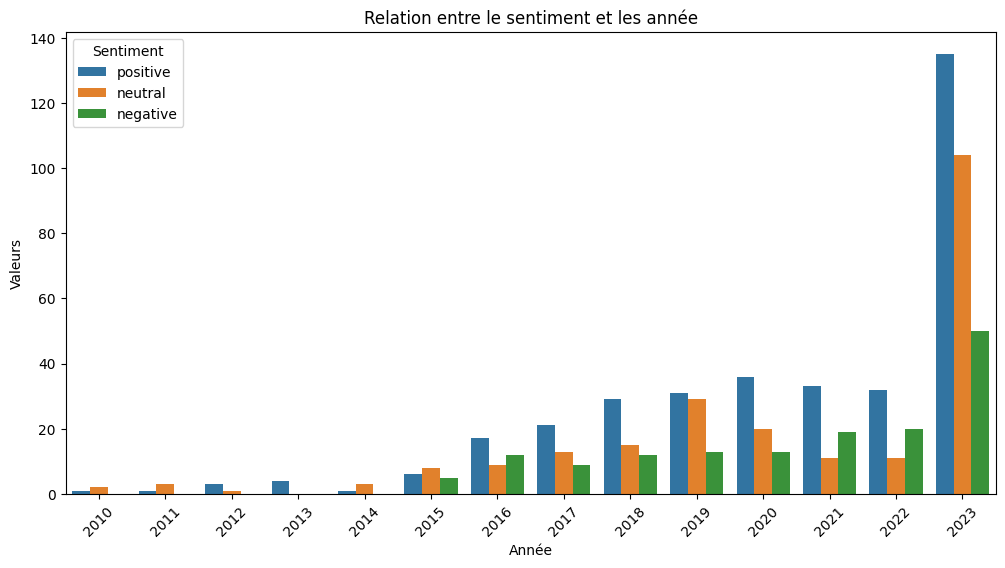

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Sentiment', data=data_sentiment)
plt.title('Relation entre le sentiment et les année')
plt.xlabel('Année')
plt.ylabel('Valeurs')
plt.xticks(rotation=45)
plt.show()

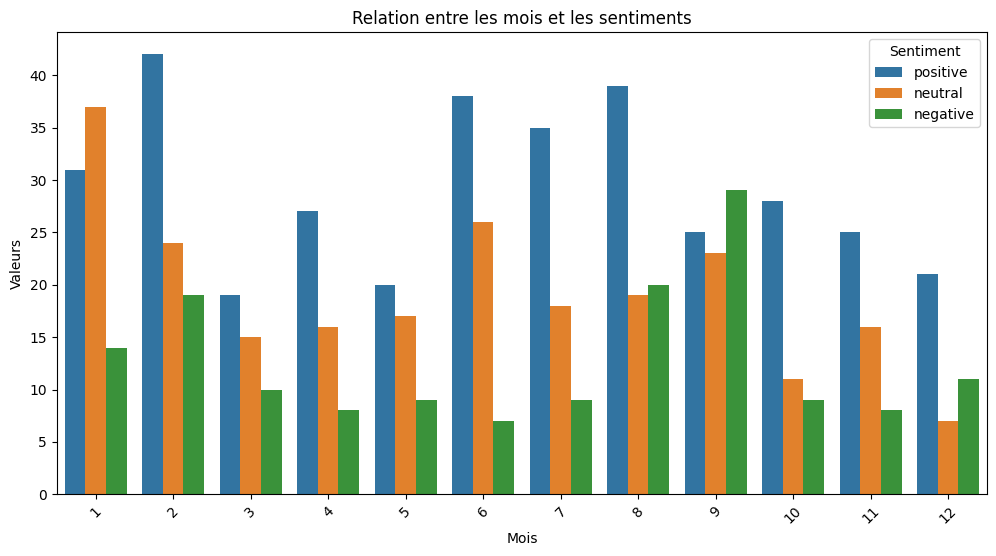

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Sentiment', data=data_sentiment)
plt.title('Relation entre les mois et les sentiments')
plt.xlabel('Mois')
plt.ylabel('Valeurs')
plt.xticks(rotation=45)
plt.show()

In [46]:
data_sentiment

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Clean_Text,Vader_Score
0,0,0,Enjoying a beautiful day at the park! ...,positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoy beauti day park,0.4939
1,1,1,Traffic was terrible this morning. ...,neutral,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic terribl morn,0.0000
2,2,2,Just finished an amazing workout! 💪 ...,neutral,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,finish amaz workout,0.0000
3,3,3,Excited about the upcoming weekend getaway! ...,neutral,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excit upcom weekend getaway,0.0000
4,4,4,Trying out a new recipe for dinner tonight. ...,neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,tri new recip dinner tonight,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,positive,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18,collabor scienc project receiv recognit region...,0.7845
728,729,733,Attending a surprise birthday party organized ...,positive,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14,attend surpris birthday parti organ friend sur...,0.9260
729,730,734,Successfully fundraising for a school charity ...,positive,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17,success fundrais school chariti initi joy give...,0.8176
730,731,735,"Participating in a multicultural festival, cel...",neutral,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20,particip multicultur festiv celebr divers musi...,0.0000
